В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
medical_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Data/medical-charges.csv")
non_smoker_df = medical_df[medical_df.smoker == 'no']

**Метод МНК**

In [136]:
def normal_equations(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [137]:
X = non_smoker_df.age
X_with_intercept = np.c_[X, np.ones(len(X))]
y = non_smoker_df.charges

coeffs_lsm = normal_equations(X_with_intercept, y)
coeffs_lsm

array([  267.24891283, -2091.42055657])

**Full batch градієнтний спуск**

In [138]:
def full_batch_gradient_descent(X, y, lr, iterations=100):
    w, b = 0, 0
    n = len(y)
    errors = []
    for _ in range(iterations):
        y_pred = w * X + b
        error = y_pred - y
        errors.append(sum(error**2) / (2 * n))
        w_gradient = np.dot(error, X) / n
        b_gradient = np.sum(error) / n
        w -= lr * w_gradient
        b -= lr * b_gradient
    return w, b, errors

In [139]:
# learning rate = 0.1
w, b, errors = full_batch_gradient_descent(X, y, 0.1)
w, b

(-2.532931988335905e+226, -5.703045037645938e+224)

In [140]:
# learning rate = 0.01
w, b, errors = full_batch_gradient_descent(X, y, 0.01)
w, b

(-1.2514983424749712e+124, -2.8178219725367077e+122)

In [141]:
# learning rate = 0.001
w, b, errors = full_batch_gradient_descent(X, y, 0.001)
w, b

(220.5792061917116, -18.647291530143125)

Графік помилки в залежності від ітерації:

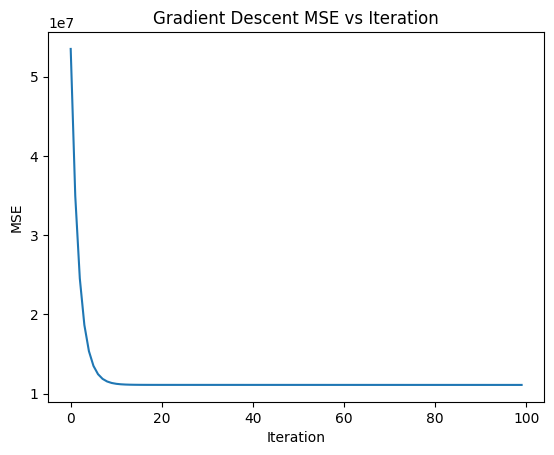

In [142]:
plt.plot(errors)

plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Gradient Descent MSE vs Iteration')

plt.show()

**Linear Regression scikit-learn**

In [143]:
lr = LinearRegression()
lr.fit(X.to_frame(), y)

lr.coef_, lr.intercept_

(array([267.24891283]), -2091.4205565650864)

**Прогнози моделей:**

In [144]:
def estimate_charges(age, w, b):
    return w * age + b

In [155]:
y_hat_lsm = estimate_charges(X, coeffs_lsm[0], coeffs_lsm[1])
y_hat_gradient_descent = estimate_charges(X, w, b)
y_hat_scikit_lr = estimate_charges(X.to_frame(), lr.coef_, lr.intercept_).squeeze()

y_hat_lsm[:5], y_hat_gradient_descent[:5], y_hat_scikit_lr[:5]

(1    2719.059874
 2    5391.549003
 3    6727.793567
 4    6460.544654
 5    6193.295741
 Name: age, dtype: float64,
 1    3951.778420
 2    6157.570482
 3    7260.466513
 4    7039.887307
 5    6819.308100
 Name: age, dtype: float64,
 1    2719.059874
 2    5391.549003
 3    6727.793567
 4    6460.544654
 5    6193.295741
 Name: age, dtype: float64)

**RMSE:**

In [146]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [147]:
rmse_lsm = rmse(y, y_hat_lsm)
rmse_gradient_descent = rmse(y, y_hat_gradient_descent)
rmse_scikit_lr = rmse(y, y_hat_scikit_lr)

display(rmse_lsm, rmse_gradient_descent, rmse_scikit_lr)

4662.505766636395

4714.406277887308

4662.505766636395

**Графік порівняння прогнозів моделей:**

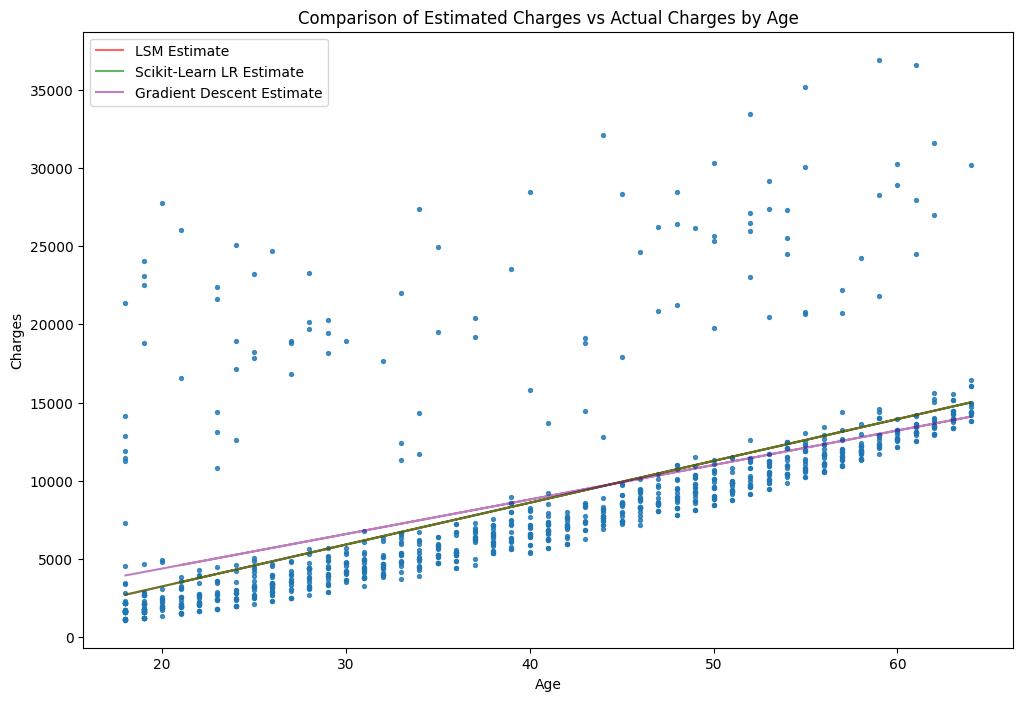

In [156]:
plt.figure(figsize=(12, 8))

plt.scatter(X, y, s=8, alpha=0.8);
plt.plot(X, y_hat_lsm, color='red', alpha=0.6, label='LSM Estimate')
plt.plot(X, y_hat_scikit_lr, color='green', alpha=0.6, label='Scikit-Learn LR Estimate')
plt.plot(X, y_hat_gradient_descent, color='purple', alpha=0.5, label='Gradient Descent Estimate');

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Comparison of Estimated Charges vs Actual Charges by Age')
plt.legend()

plt.show()

**Висновок:**

Результати моделей лінейної регресії з scikit-learn.LinearRegression і з використанням МНК є ідентичними, що логічно, адже в scikit-learn.LinearRegression під капотом використовується МНК. Градієнтний спуск має трохи гірший результат (його rmse - 4714 проти 4662 у МНК).
Ці параметри дуже близькі до  моїх найкращих припущень в попередньому завданні :)

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [149]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [150]:
X_smokers = smoker_df.age
y_smokers = smoker_df.charges

In [151]:
lr_smokers = LinearRegression()
lr_smokers.fit(X_smokers.to_frame(), y_smokers)

lr_smokers.coef_, lr_smokers.intercept_

(array([305.23760211]), 20294.128126915966)

In [152]:
y_hat_smokers = estimate_charges(X_smokers.to_frame(), lr_smokers.coef_, lr_smokers.intercept_).squeeze()

In [153]:
rmse_smokers = rmse(y_smokers, y_hat_smokers)
rmse_smokers

10711.00334810241

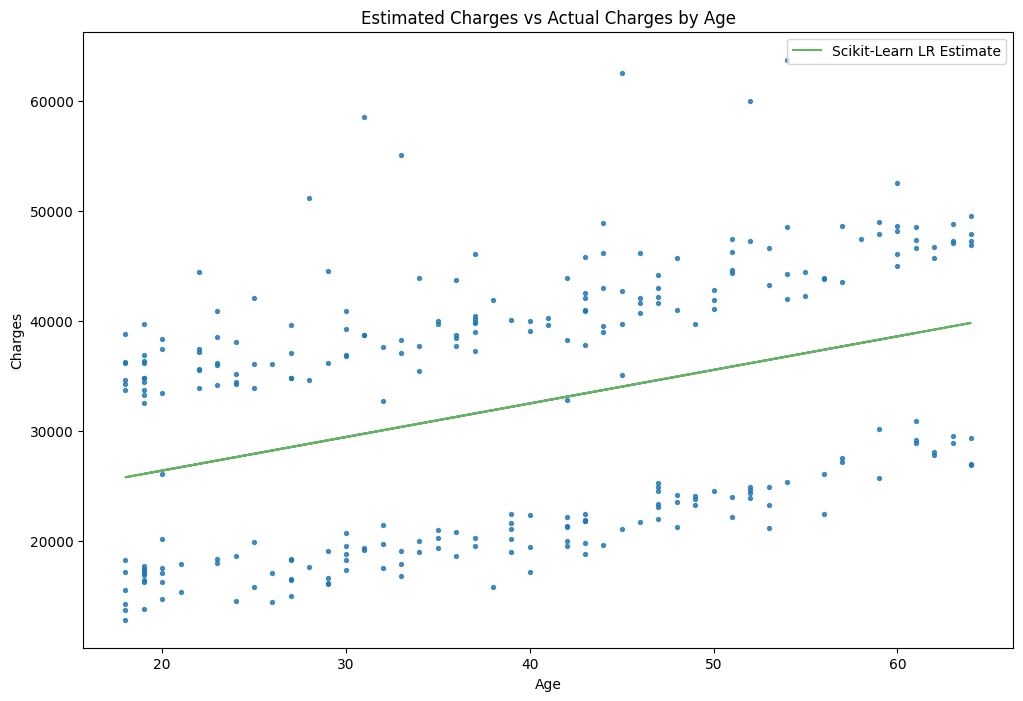

In [157]:
plt.figure(figsize=(12, 8))

plt.scatter(X_smokers, y_smokers, s=8, alpha=0.8);
plt.plot(X_smokers, y_hat_smokers, color='green', alpha=0.6, label='Scikit-Learn LR Estimate')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Estimated Charges vs Actual Charges by Age')
plt.legend()

plt.show()

**Висновок:**

На цій діаграмі розсіювання ми бачимо два скупчення точок. Лінія нашої моделі проходить чітко між ними, при цьому вона не описує добре жодну з груп. На мою думку, ми мали би дослідити, які ще фактори впливають на цільову змінну окрім віку, і побудувати модель на основі більшої кільності ознак, яка б краще підходила під наші дані. Цю модель в компанії я би не використовувала.